In [34]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [35]:
img1 = cv2.imread(r"C:\Users\keshavaram\Downloads\left.jpg")
img2 = cv2.imread(r"C:\Users\keshavaram\Downloads\right.jpg")

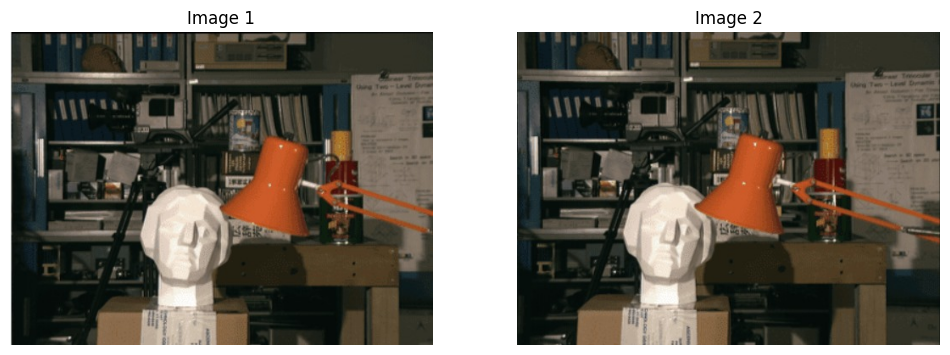

In [36]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Image 2')
plt.axis('off')
plt.show()


In [37]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)


In [38]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)


In [39]:
points1 = np.float32([kp1[m.queryIdx].pt for m in matches])
points2 = np.float32([kp2[m.trainIdx].pt for m in matches])


In [40]:
F, mask = cv2.findFundamentalMat(points1, points2, method=cv2.FM_RANSAC)


In [41]:
points1 = points1[mask.ravel() == 1]
points2 = points2[mask.ravel() == 1]


In [42]:
focal_length = 800  
center = (img1.shape[1] / 2, img1.shape[0] / 2)

K = np.array([[focal_length, 0, center[0]],
              [0, focal_length, center[1]],
              [0, 0, 1]])


In [43]:
t = np.array([0, 0, 0])  
R = np.eye(3)  
P1 = K @ np.hstack((R, t.reshape(-1, 1)))  
t1 = np.array([0, 0, 0])  
t2 = np.array([0, 0, 5])  
P2 = K @ np.hstack((R, t2.reshape(-1, 1)))  
points_4d_hom = cv2.triangulatePoints(P1, P2, points1.T, points2.T)
points_3d = points_4d_hom[:3] / points_4d_hom[3] 

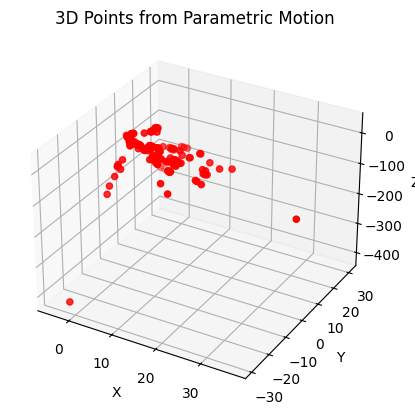

3D Points:
 [[ 1.0993627e+01  1.3777039e+01 -8.1532707e+01]
 [ 4.4028063e+00  1.5192594e+01 -9.7918472e+01]
 [ 1.0302219e+01  2.9760078e-01 -5.4969757e+01]
 [ 3.3824375e+00  4.0259786e+00 -4.0658352e+01]
 [ 4.9521689e+00  4.6431141e+00 -4.4838852e+01]
 [ 1.6426964e+01 -2.3087730e+00 -7.1593063e+01]
 [ 3.2473352e+00  4.3051300e+00 -4.1901947e+01]
 [ 1.1168346e+01  1.3987318e+01 -8.2790398e+01]
 [ 9.5819178e+00  2.6695533e+00 -5.4676636e+01]
 [ 3.6471016e+00  4.0548778e+00 -4.0932083e+01]
 [ 3.9523625e+00  1.3695709e+01 -8.8457573e+01]
 [-5.4632306e-01 -1.0457069e+01 -1.4574672e+02]
 [ 1.7854694e+01 -2.5802040e+00 -7.7724434e+01]
 [ 4.1865058e+00  1.4173913e+01 -9.1527008e+01]
 [ 5.7903028e+00  2.6724734e+00  3.1666124e+01]
 [ 5.7368150e+00  2.6502459e+00  3.1708418e+01]
 [ 4.8111529e+00  4.6097217e+00 -4.4160732e+01]
 [ 1.0808663e+01  2.5474880e+00 -6.1736847e+01]
 [ 7.5425010e+00 -2.7703412e+00 -4.7196198e+01]
 [ 1.0981839e+01  1.8723199e-01 -5.8859932e+01]
 [ 1.0585763e+01  2.3696251e

In [44]:

# Step 11: Visualize 3D points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_3d[0], points_3d[1], points_3d[2], c='r', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Points from Parametric Motion')
plt.show()

# Print optimized 3D points
print("3D Points:\n", points_3d.T)


In [45]:

t = np.arange(len(key_positions))
spline = CubicSpline(t, key_positions, bc_type='natural')

t_spline = np.linspace(0, len(key_positions) - 1, 100)
spline_positions = spline(t_spline)


In [46]:


points_4d_list = []
for pos in spline_positions:
    
    R = np.eye(3)
    P = K @ np.hstack((R, pos.reshape(-1, 1))) 
    points_4d_hom = cv2.triangulatePoints(P, P, points1.T, points2.T)  
    points_4d_list.append(points_4d_hom)



In [47]:
points_3d = np.hstack([p[:3] / p[3] for p in points_4d_list])  

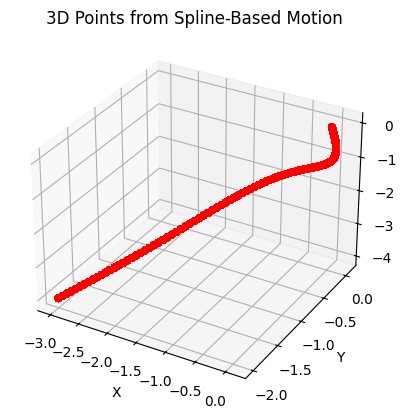

3D Points:
 [[ 0.         0.         0.       ]
 [ 0.         0.         0.       ]
 [ 0.         0.         0.       ]
 ...
 [-3.0000002 -2.        -4.       ]
 [-3.0000002 -2.        -4.       ]
 [-3.0000002 -2.        -4.       ]]


In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_3d[0], points_3d[1], points_3d[2], c='r', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Points from Spline-Based Motion')
plt.show()

print("3D Points:\n", points_3d.T)
